In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# Imports
import os
import pandas as pd
import datetime

In [9]:
PROJECT_PATH = os.path.dirname(os.getcwd())
data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'OMA_7.parquet') # Change to local data path
clustered_data_path = os.path.join(PROJECT_PATH, 'data', 'Elia', 'clustered_modes.parquet') # Change to local data path

oma_data = pd.read_parquet(data_path)
clustered_data = pd.read_parquet(clustered_data_path)
sensor = 'mpe_MO_04_ACC3_Z'
sensor_data = pd.DataFrame.from_records(oma_data[sensor].explode().dropna().tolist()).set_index(oma_data[sensor].explode().index)

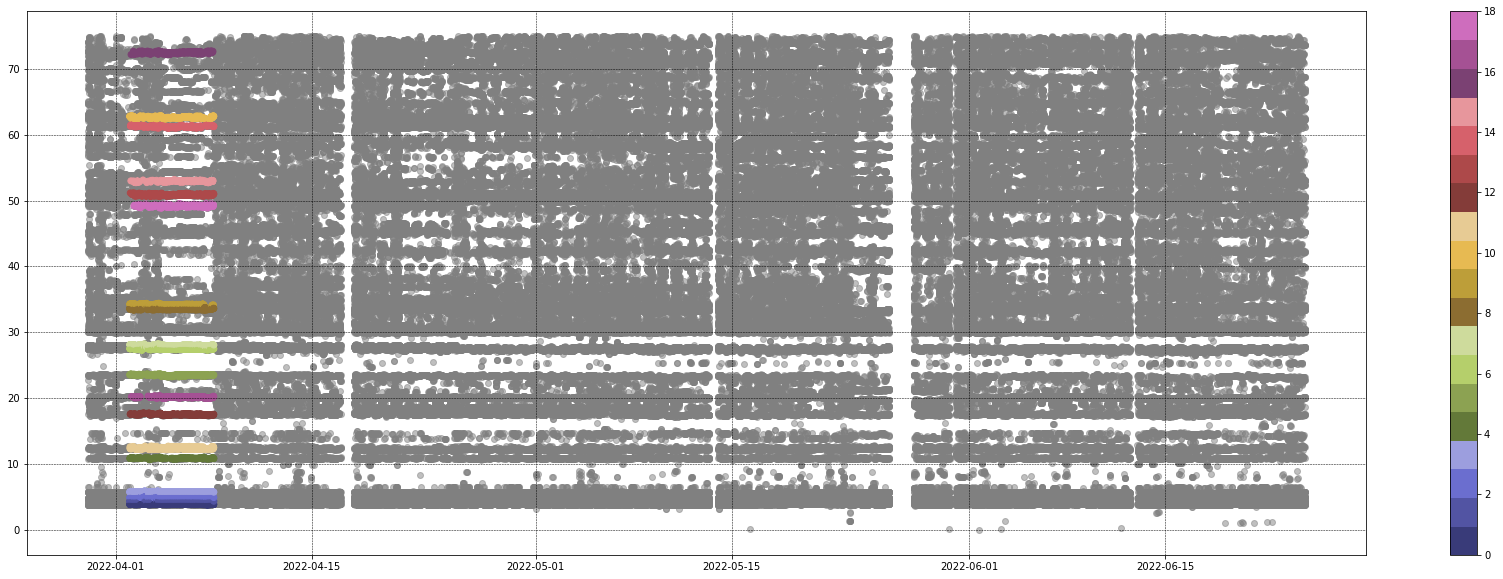

In [10]:
# Illustration of the tracking vs clustering problem
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_data.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(clustered_data.index, clustered_data['frequency'], c=clustered_data['labels'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
cbar = plt.colorbar()

In [13]:
modes = \
    pd.concat(
        [
            clustered_data.groupby('labels').mean().add_prefix('mean_'),
            clustered_data.groupby('labels').std().add_prefix('std_')
        ],
        axis=1)
modes[['mean_frequency', 'std_frequency']].sort_values('mean_frequency').reset_index().drop('labels', axis=1)

,mean_frequency,std_frequency
0,3.886514,0.009703
1,4.369188,0.016888
2,4.934242,0.026588
3,5.759343,0.028830
4,10.886952,0.043343
5,12.402089,0.116690
6,17.538265,0.065388
7,20.182594,0.070763
8,23.501248,0.064895
9,27.476536,0.053725


In [58]:
from oma_tracking.oma_tracking import ModeTracking
modes['max_distance'] = modes['std_frequency']*5
modes['labels'] = modes.index
tracked_modes = ModeTracking(modes, sensor_data).classify_indices()

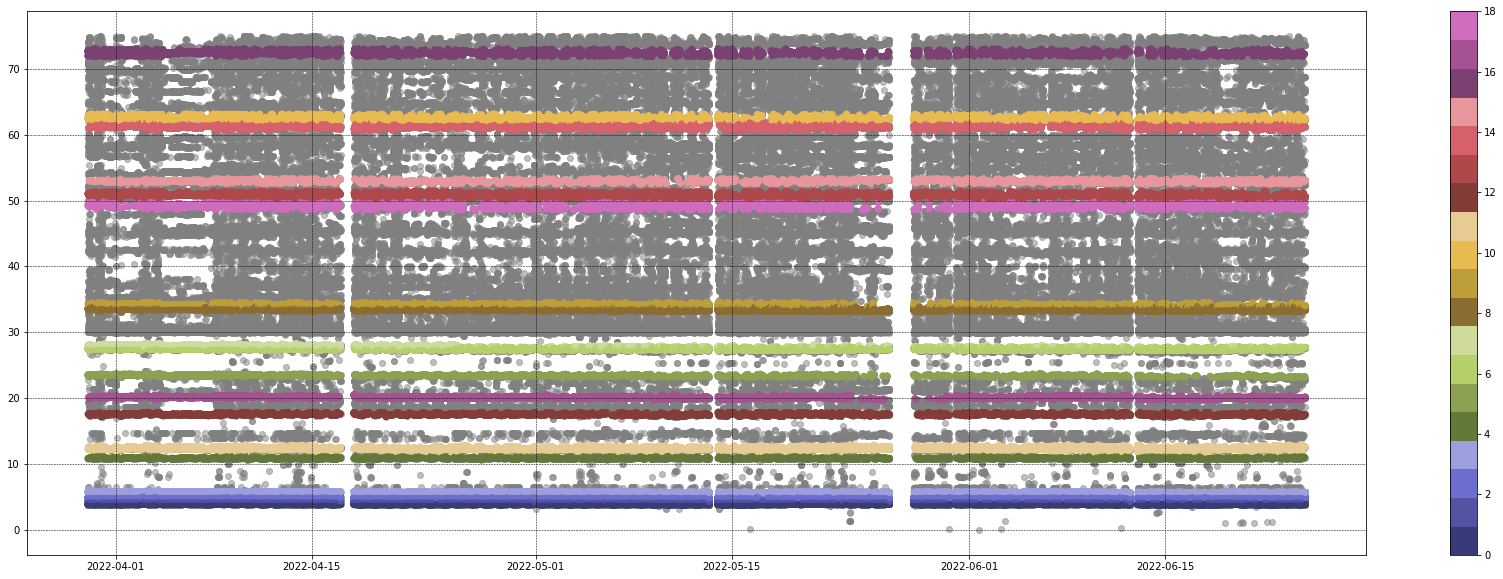

In [59]:
# Illustration of the tracking vs clustering problem
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tracked_modes_plot = tracked_modes[tracked_modes['labels'] != 'undefined']

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_data.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(tracked_modes_plot.index, tracked_modes_plot['frequency'], c=tracked_modes_plot['labels'], cmap = cmap)
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
cbar = plt.colorbar()

In [60]:
tracked_modes_plot

,algorithm,damping,frequency,location,mode_shape,name,size,std_damping,std_frequency,labels
timestamp,,,,,,,,,,
2022-03-30 00:00:00+00:00,lscf,0.231345,3.879023,None,None,mpe_MO_04_ACC3_Z,69,0.144529,0.004218,0
2022-03-30 00:00:00+00:00,lscf,0.153973,4.362347,None,None,mpe_MO_04_ACC3_Z,36,0.087254,0.003114,1
2022-03-30 00:00:00+00:00,lscf,0.294294,4.935436,None,None,mpe_MO_04_ACC3_Z,51,0.104351,0.003847,2
2022-03-30 00:00:00+00:00,lscf,0.400023,5.792584,None,None,mpe_MO_04_ACC3_Z,69,0.273635,0.010812,3
2022-03-30 00:00:00+00:00,lscf,0.326438,10.855542,None,None,mpe_MO_04_ACC3_Z,11,0.180036,0.004388,4
...,...,...,...,...,...,...,...,...,...,...
2022-06-24 23:50:00+00:00,lscf,0.512373,34.013749,None,None,mpe_MO_04_ACC3_Z,36,0.129730,0.012842,9
2022-06-24 23:50:00+00:00,lscf,0.220011,50.626011,None,None,mpe_MO_04_ACC3_Z,31,0.040208,0.009698,13
2022-06-24 23:50:00+00:00,lscf,0.321904,53.049957,None,None,mpe_MO_04_ACC3_Z,49,0.045462,0.013538,15


(27.0, 28.5)

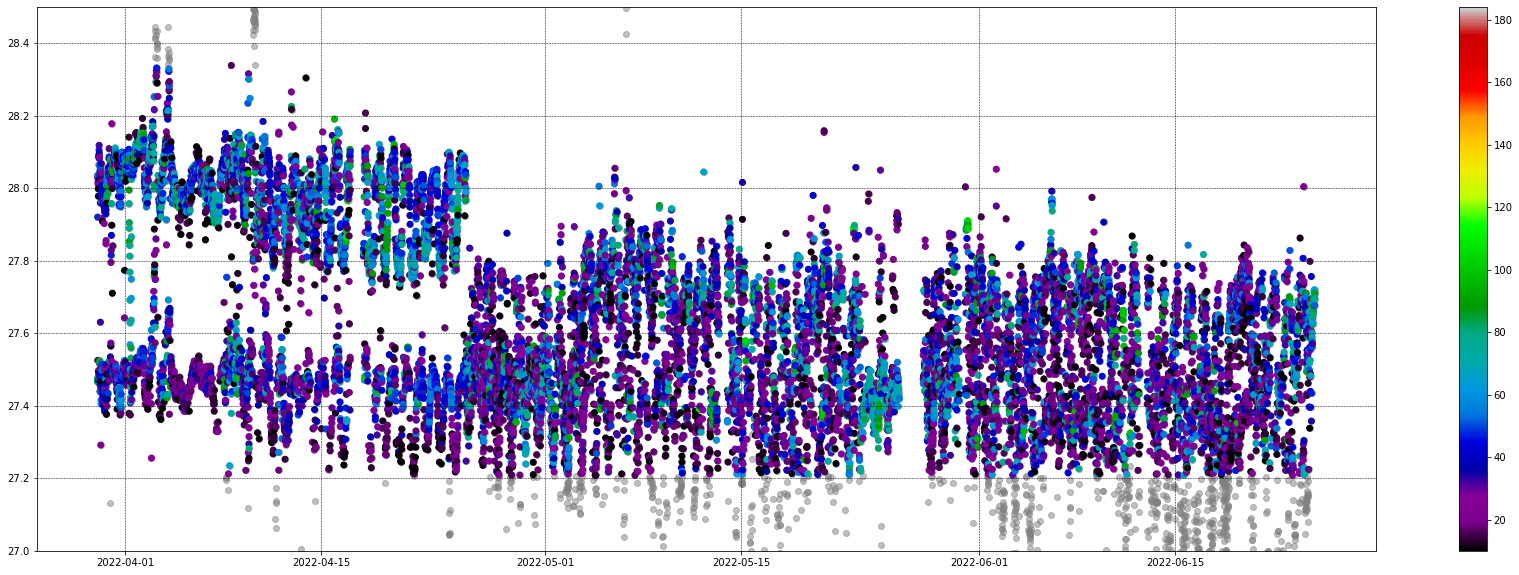

In [61]:
# Illustration of the tracking vs clustering problem
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tracked_modes_plot = tracked_modes[(tracked_modes['labels'] != 'undefined') & (tracked_modes['damping'] <= 1.0)]

fig = plt.figure(figsize = (30,10))
plt.scatter(sensor_data.index, sensor_data['frequency'], alpha=0.5, color='grey')

tab10 = plt.get_cmap('tab20b')
first_colors = tab10(range(0,len(clustered_data.labels.unique()),1))
cmap = ListedColormap(first_colors)

plt.scatter(tracked_modes_plot.index, tracked_modes_plot['frequency'], c=tracked_modes_plot['size'], cmap = 'nipy_spectral')
plt.grid(True, color='k', linestyle='--', linewidth=0.5)
cbar = plt.colorbar()
plt.ylim(27,28.5)